In [1]:
# Add the parent directory to sys.path
import sys, os
from pathlib import Path

current_directory = os.getcwd()
parent_directory = Path(current_directory).parent.parent
sys.path.insert(0, str(parent_directory))
sys.path

['c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis',
 'C:\\Users\\mekbi\\AppData\\Local\\Programs\\Python\\Python312\\python312.zip',
 'C:\\Users\\mekbi\\AppData\\Local\\Programs\\Python\\Python312\\DLLs',
 'C:\\Users\\mekbi\\AppData\\Local\\Programs\\Python\\Python312\\Lib',
 'C:\\Users\\mekbi\\AppData\\Local\\Programs\\Python\\Python312',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv',
 '',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv\\Lib\\site-packages',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv\\Lib\\site-packages\\win32',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv\\Lib\\site-packages\\win32\\lib',
 'c:\\Users\\mekbi\\Desktop\\Kifiya\\week-2\\telecom-data-analysis\\venv\\Lib\\site-packages\\Pythonwin']

## Connect to DataBase

In [2]:
# Import the utils module
from scripts import utils

In [3]:
# Load environment variables and connect to database
CREDENTIALS = utils.load_environment_variables(parent_directory=parent_directory)
connection = utils.connect_to_database({"dbname": CREDENTIALS['DB_NAME'],
                                 "user": CREDENTIALS['USER'],
                                 "host": CREDENTIALS['host'],
                                 "port": CREDENTIALS['port']})

INFO:scripts.utils:Trying to load environment variables from c:\Users\mekbi\Desktop\Kifiya\week-2\telecom-data-analysis/.env
INFO:scripts.utils:Credentials loaded successfully
INFO:scripts.utils:Attempting to connect to the database
INFO:scripts.utils:Connection successful


In [4]:
# Load the db files into pandas dataframe and close the connection
table_name = 'xdr_data'
df = utils.load_data_from_db(conn=connection,
                       table_name=table_name)
utils.close_database_connection(conn=connection)

INFO:root:Executing query: SELECT * FROM xdr_data
c:\Users\mekbi\Desktop\Kifiya\week-2\telecom-data-analysis\scripts\utils.py:48: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)
INFO:scripts.utils:Data loaded into DataFrame successfully
INFO:root:Database connection closed successfully


## Data Aggregation

In [5]:
# Inspect dataset
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [6]:
# Aggregate per user relevant columns
aggregation_methods = {
    'Bearer Id': 'count',               # Number of sessions
    'Dur. (ms)': 'sum',                  # Total session duration
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',   
    'Youtube DL (Bytes)': 'sum',        
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum',
    'Total DL (Bytes)': 'sum',          # Total download data
    'Total UL (Bytes)': 'sum',          # Total upload data
    }

user_data = df.groupby('MSISDN/Number').agg(aggregation_methods).reset_index()
user_data['Total Data (Bytes)'] = user_data['Total DL (Bytes)'] + user_data['Total UL (Bytes)']
user_data

,MSISDN/Number,Bearer Id,Dur. (ms),Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes),Total Data (Bytes)
0,3.360100e+10,1,116720.0,2206504.0,25631.0,14900201.0,6724347.0,10265105.0,16915876.0,3337123.0,1051882.0,837400.0,493962.0,8.110911e+08,1367528.0,377096990.0,9473882.0,8.426375e+08,36053108.0,8.786906e+08
1,3.360100e+10,1,181230.0,2598548.0,62017.0,5324251.0,7107972.0,770569.0,10451194.0,4197697.0,1137166.0,2828821.0,478960.0,1.050353e+08,14714780.0,279557701.0,2152370.0,1.207552e+08,36104459.0,1.568596e+08
2,3.360100e+10,1,134969.0,3148004.0,47619.0,2137272.0,19196298.0,16525919.0,2827981.0,3343483.0,99643.0,2436500.0,768880.0,5.290685e+08,9759228.0,495086501.0,6607171.0,5.566597e+08,39306820.0,5.959665e+08
3,3.360101e+10,1,49878.0,251469.0,28825.0,4393123.0,2584198.0,1157362.0,784730.0,5937765.0,3740728.0,2178618.0,106052.0,3.880748e+08,3051292.0,25248001.0,10031701.0,4.019932e+08,20327526.0,4.223207e+08
4,3.360101e+10,2,37104.0,2861230.0,51312.0,10339971.0,31193031.0,24971647.0,24230077.0,13728668.0,4770948.0,2247808.0,1057661.0,1.308981e+09,5816727.0,777643713.0,27160771.0,1.363130e+09,94280527.0,1.457411e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106851,3.379000e+10,1,8810.0,234320.0,65863.0,8294310.0,18353533.0,14754741.0,147797.0,6834178.0,697091.0,480946.0,525969.0,6.573267e+08,3034642.0,291391283.0,3891534.0,6.879252e+08,26716429.0,7.146416e+08
106852,3.379000e+10,1,140988.0,442214.0,56355.0,5596862.0,14254710.0,6929961.0,1601099.0,1472406.0,3957299.0,2513433.0,664.0,4.276202e+08,9383076.0,204636073.0,6479040.0,4.445751e+08,35732243.0,4.803073e+08
106853,3.197021e+12,1,877385.0,668596.0,46628.0,9839889.0,2120016.0,10340908.0,16251392.0,8572779.0,1865881.0,842279.0,678492.0,1.645636e+08,13485133.0,467678100.0,2848373.0,1.948281e+08,37295915.0,2.321240e+08
106854,3.370000e+14,1,253030.0,496337.0,25229.0,16690728.0,20044212.0,9983678.0,20921364.0,8215537.0,1615080.0,2989663.0,328919.0,5.012590e+08,8883653.0,144354057.0,4834382.0,5.396350e+08,56652839.0,5.962878e+08


# Data overview and cleaning

In [7]:
# Import the missing value handler class and create an instance for it
from scripts.data_processing import MissingValueHandler

missing_value_handler = MissingValueHandler(df=user_data)

INFO:root:MissingValueHandler instance created


In [8]:
# Get a summary of missing values
summary = missing_value_handler.missing_value_summary()
summary

INFO:root:Missing value summary computed successfully


MSISDN/Number              0
Bearer Id                  0
Dur. (ms)                  0
Social Media DL (Bytes)    0
Social Media UL (Bytes)    0
Youtube DL (Bytes)         0
Youtube UL (Bytes)         0
Netflix DL (Bytes)         0
Netflix UL (Bytes)         0
Google DL (Bytes)          0
Google UL (Bytes)          0
Email DL (Bytes)           0
Email UL (Bytes)           0
Gaming DL (Bytes)          0
Gaming UL (Bytes)          0
Other DL (Bytes)           0
Other UL (Bytes)           0
Total DL (Bytes)           0
Total UL (Bytes)           0
Total Data (Bytes)         0
dtype: int64

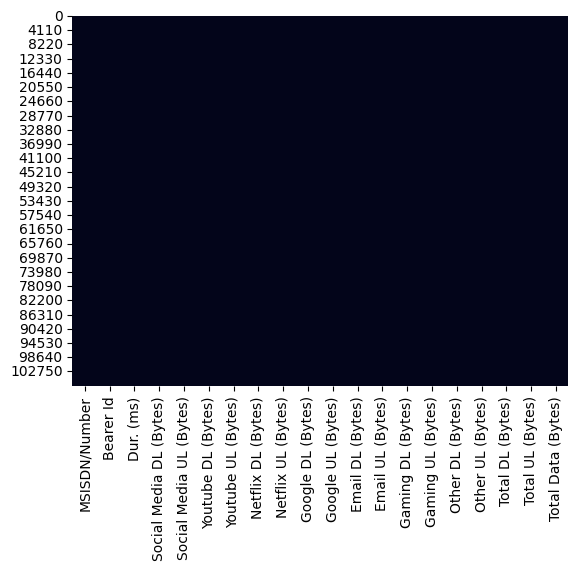

INFO:root:Missing values heatmap displayed successfully


In [12]:
# Show heatmap for missing values
missing_value_handler.missing_values_heatmap()

- Interpretation: The dataset shows there is avaliiable data for each user.

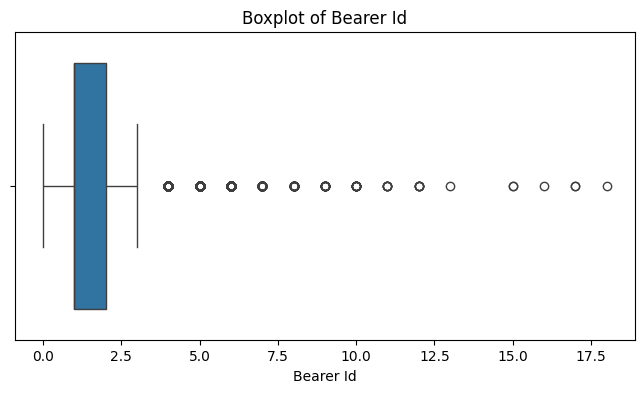

INFO:root:Boxplot for column 'Bearer Id' displayed successfully


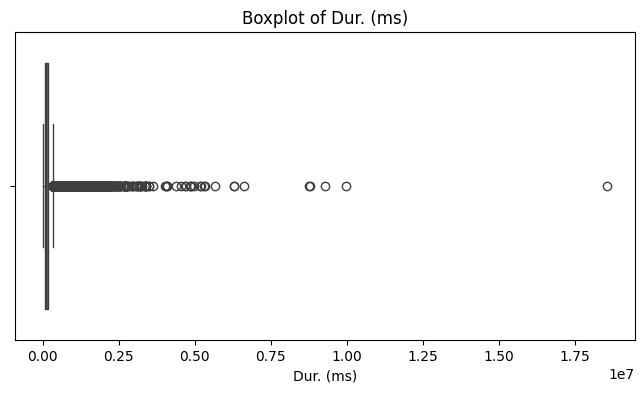

INFO:root:Boxplot for column 'Dur. (ms)' displayed successfully


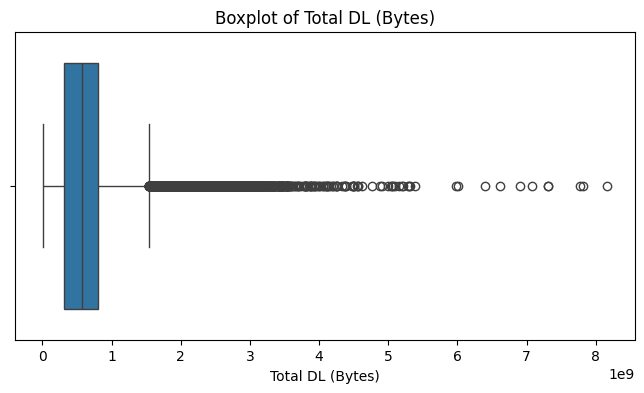

INFO:root:Boxplot for column 'Total DL (Bytes)' displayed successfully


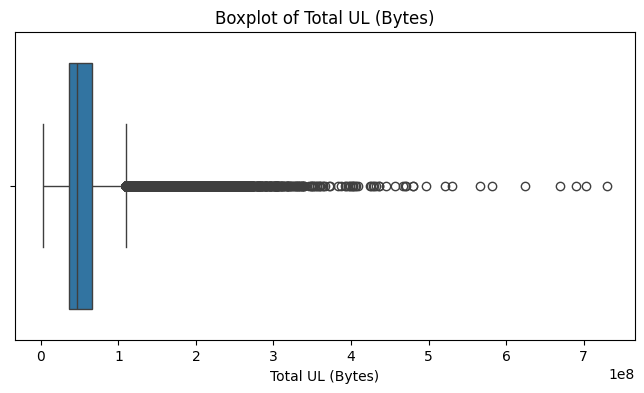

INFO:root:Boxplot for column 'Total UL (Bytes)' displayed successfully


In [9]:
# Inspect outliers for the main columns
missing_value_handler.inspect_outliers(columns=['Bearer Id', 'Dur. (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)'])

- Interpretation: The dataset shows significant number of outliers.

# Additional Visualization

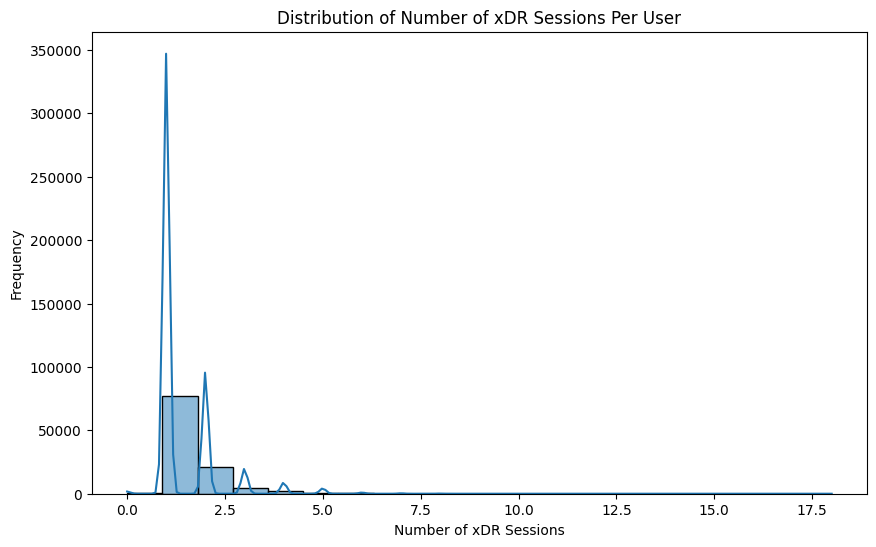

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of the number of xDR sessions per user
plt.figure(figsize=(10,6))
sns.histplot(user_data['Bearer Id'], bins=20, kde=True)
plt.title('Distribution of Number of xDR Sessions Per User')
plt.xlabel('Number of xDR Sessions')
plt.ylabel('Frequency')
plt.show()

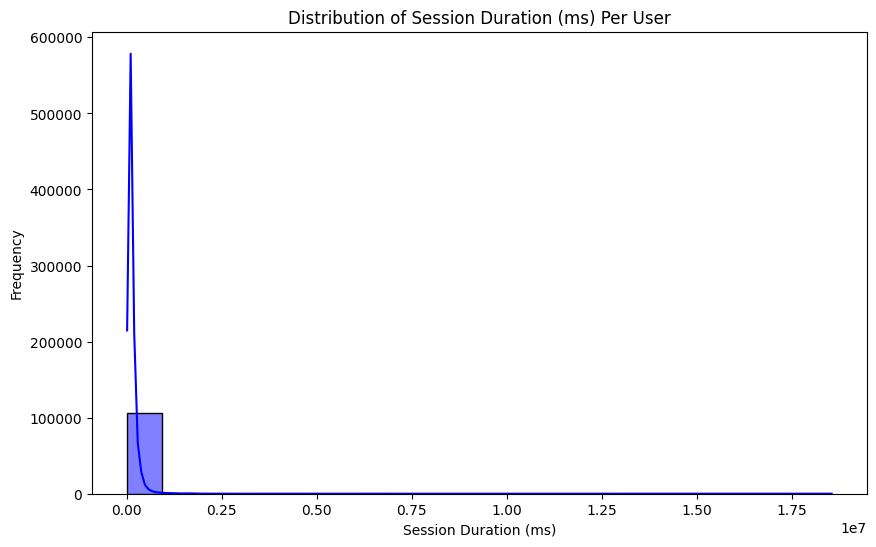

In [17]:
# Histogram for session duration
plt.figure(figsize=(10,6))
sns.histplot(user_data['Dur. (ms)'], bins=20, kde=True, color='blue')
plt.title('Distribution of Session Duration (ms) Per User')
plt.xlabel('Session Duration (ms)')
plt.ylabel('Frequency')
plt.show()


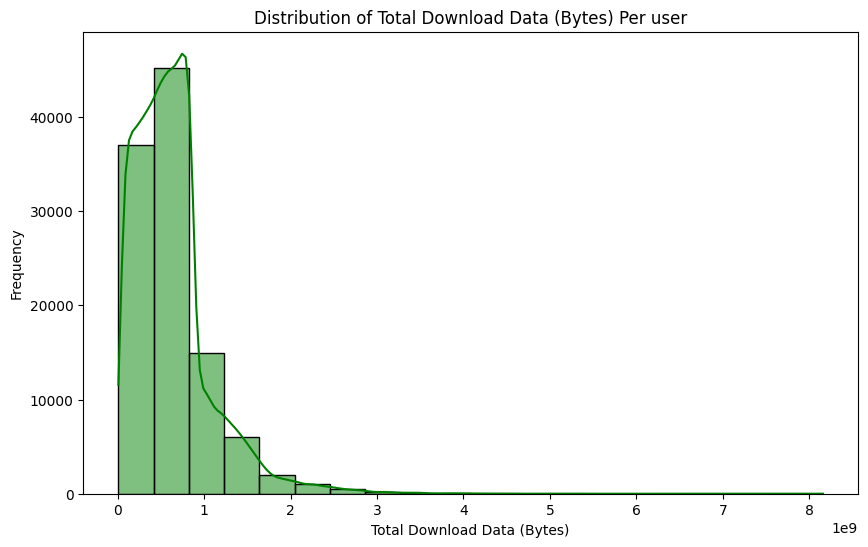

In [18]:
# Histogram for total download data per user
plt.figure(figsize=(10,6))
sns.histplot(user_data['Total DL (Bytes)'], bins=20, kde=True, color='green')
plt.title('Distribution of Total Download Data (Bytes) Per user')
plt.xlabel('Total Download Data (Bytes)')
plt.ylabel('Frequency')
plt.show()

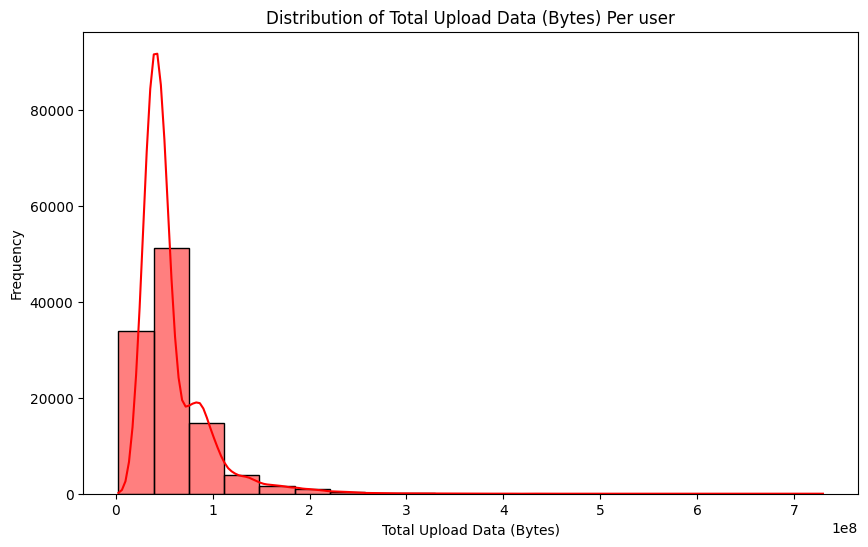

In [19]:
# Histogram for total upload data
plt.figure(figsize=(10,6))
sns.histplot(user_data['Total UL (Bytes)'], bins=20, kde=True, color='red')
plt.title('Distribution of Total Upload Data (Bytes) Per user')
plt.xlabel('Total Upload Data (Bytes)')
plt.ylabel('Frequency')
plt.show()

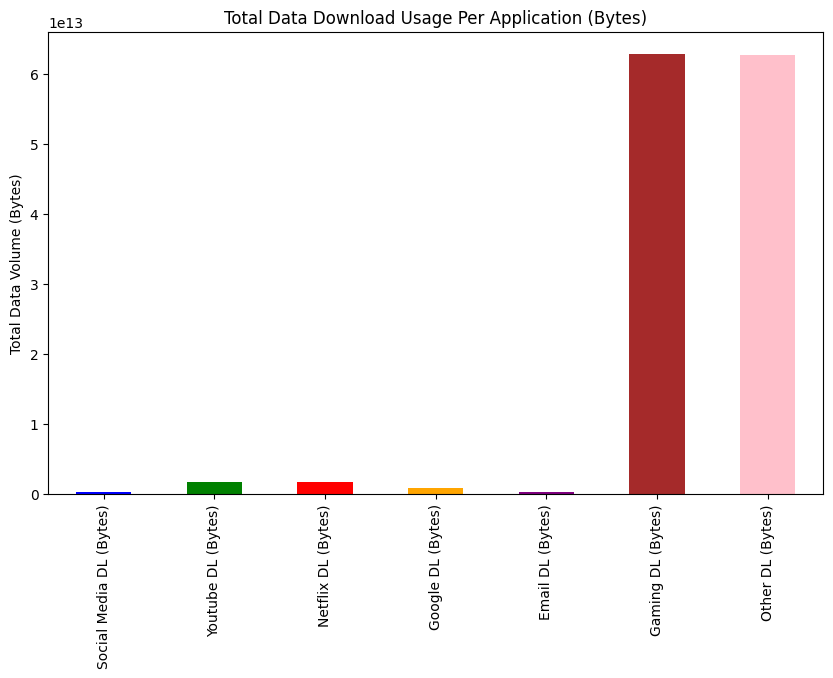

In [23]:
# Bar chart for data download usage per application
applications = ['Social Media DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 
                'Google DL (Bytes)', 'Email DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

user_data_app = user_data[applications].sum()

# Bar plot for total data per application
plt.figure(figsize=(10,6))
user_data_app.plot(kind='bar', color=['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink'])
plt.title('Total Data Download Usage Per Application (Bytes)')
plt.ylabel('Total Data Volume (Bytes)')
plt.show()


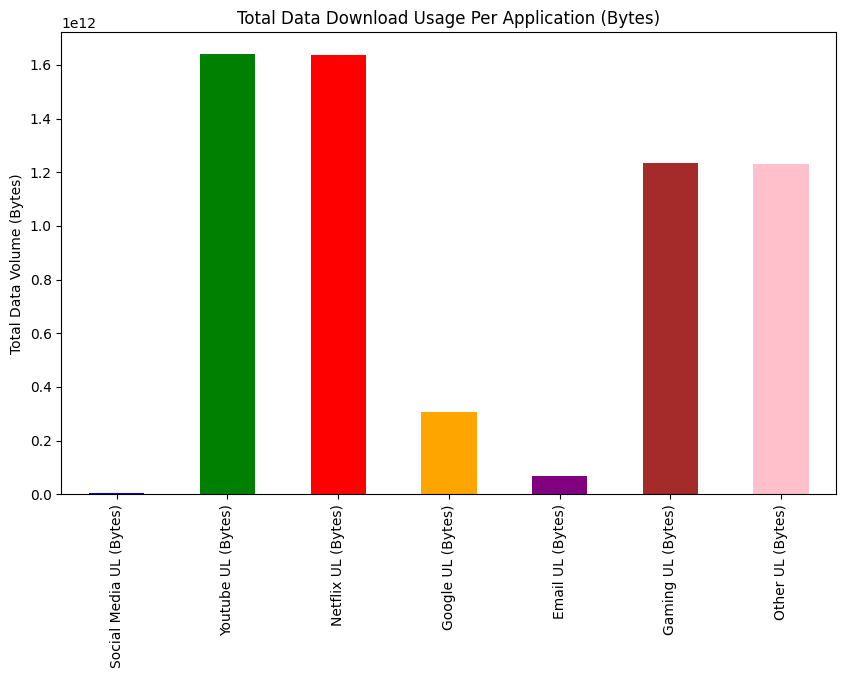

In [25]:
# Bar chart for data upload usage per application
applications = ['Social Media UL (Bytes)', 'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 
                'Google UL (Bytes)', 'Email UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)']

user_data_app = user_data[applications].sum()

# Bar plot for total data per application
plt.figure(figsize=(10,6))
user_data_app.plot(kind='bar', color=['blue', 'green', 'red', 'orange', 'purple', 'brown', 'pink'])
plt.title('Total Data Download Usage Per Application (Bytes)')
plt.ylabel('Total Data Volume (Bytes)')
plt.show()